In [1]:
import yaml
import os

In [2]:
with open("/Users/sigmoid/Documents/PepsiCo - Gen AI PoC/lift_bot_streamlit/config.yaml", "r") as f:
    llm_keys = yaml.safe_load(f)

In [3]:
if llm_keys["open_ai"].strip() != "":
    os.environ["OPENAI_API_KEY"] = llm_keys["open_ai"]

In [4]:
import os
import pandas as pd
from langchain.schema import HumanMessage
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI

In [5]:
from main_file import InsightAgentLift

In [6]:
file_path = '/Users/sigmoid/Documents/PepsiCo - Gen AI PoC/lift_bot_streamlit/src'

In [7]:
# Load data (MODIFIED for new structure)
df_expenses = pd.read_csv(f"{file_path}/data/Expense.csv")

In [8]:
df_expenses.head()

,Country,Year,Month,Category,Brand,Data Type,Tier 1,Tier 2,Tier 3,Expense,Status,Count
0,Brazil,2022,1,CSD Colas,PEPSI,A&M,PULL - Non working,Agency Fees,Creative Agency Fees,125,Approved,1
1,Brazil,2022,1,CSD Colas,PEPSI,A&M,PULL - Non working,Agency Fees,Media Agency Fees,"20,603",Approved,1
2,Brazil,2022,1,CSD Colas,PEPSI,A&M,PULL - Non working,Agency Fees,Social Media/Influence Marketing,847,Approved,1
3,Brazil,2022,1,CSD Colas,PEPSI,A&M,PULL - Non working,Insight,Advanced Analytics,"39,123",Approved,1
4,Brazil,2022,1,CSD Colas,PEPSI,A&M,PULL - Non working,Insight,Consumer Tracking,"1,951",Approved,1


In [9]:
df_budget = pd.read_csv(f"{file_path}/data/Budget.csv")

In [10]:
# Handle budget data type conversion if needed
if "2023 - Budget" in df_budget.columns:
    df_budget["2023 - Budget"] = (
        df_budget["2023 - Budget"].str.replace(",", "", regex=False).astype(int)
    )
if "2024 - Budget" in df_budget.columns:
    df_budget["2024 - Budget"] = (
        df_budget["2024 - Budget"].str.replace(",", "", regex=False).astype(int)
    )

In [11]:
df_budget.head()

,Country,Tier 1,Tier 2,Tier 3,2023 - Split (%),2024 - Split (%),2023 - Budget,2024 - Budget
0,Mexico,Pull-Non-Working,Ad Production,Digital Ad Production,0.0000,0.0000,0,0
1,Mexico,Pull-Non-Working,Ad Production,Other Ad Production,0.0000,0.0000,0,0
2,Mexico,Pull-Non-Working,Ad Production,TV Print Radio OOH Prod,0.0030,0.0030,375924,389021
3,Mexico,Pull-Non-Working,Agency Fees,Creative Agency Fees,0.0000,0.0000,0,0
4,Mexico,Pull-Non-Working,Agency Fees,In Store and POS Design/Development,0.0015,0.0015,187962,194511


In [12]:
# Create Agent-Lift instance once
agent_lift = InsightAgentLift(
    df_expenses,
    df_budget,
    file_path='/Users/sigmoid/Documents/PepsiCo - Gen AI PoC/lift_bot_streamlit/src'
)

In [13]:
question = "How are the Tier 1 expenses in CY varying for Mexico & Brazil for Pepsi brand?"


🔍 Processing: How are the Tier 1 expenses in CY varying for Mexico & Brazil for Pepsi brand?
⏳ Please wait...
================================== Ai Message ==================================
Name: supervisor

Routing to Insight Agent for data analysis.
🔍 Insight Agent analyzing: How are the Tier 1 expenses in CY varying for Mexico & Brazil for Pepsi brand?
🤖 LLM Task 1: Selecting tools...
🔧 Tool Selection: {'tools_needed': ['expense'], 'reasoning': "The user question is focused on analyzing how Tier 1 expenses for the Pepsi brand are varying in the current year (CY) for Mexico and Brazil. This requires examining current expense data, identifying trends, and comparing metrics across these regions and the specified brand and tier. The 'analyze_expense_data' tool is specifically designed for such tasks, including expense analysis, trend identification, and regional comparisons.", 'execution_order': ['analyze_expense_data']}
⚙️ Executing analyze_expense_data tool...
Segments are: {'approa

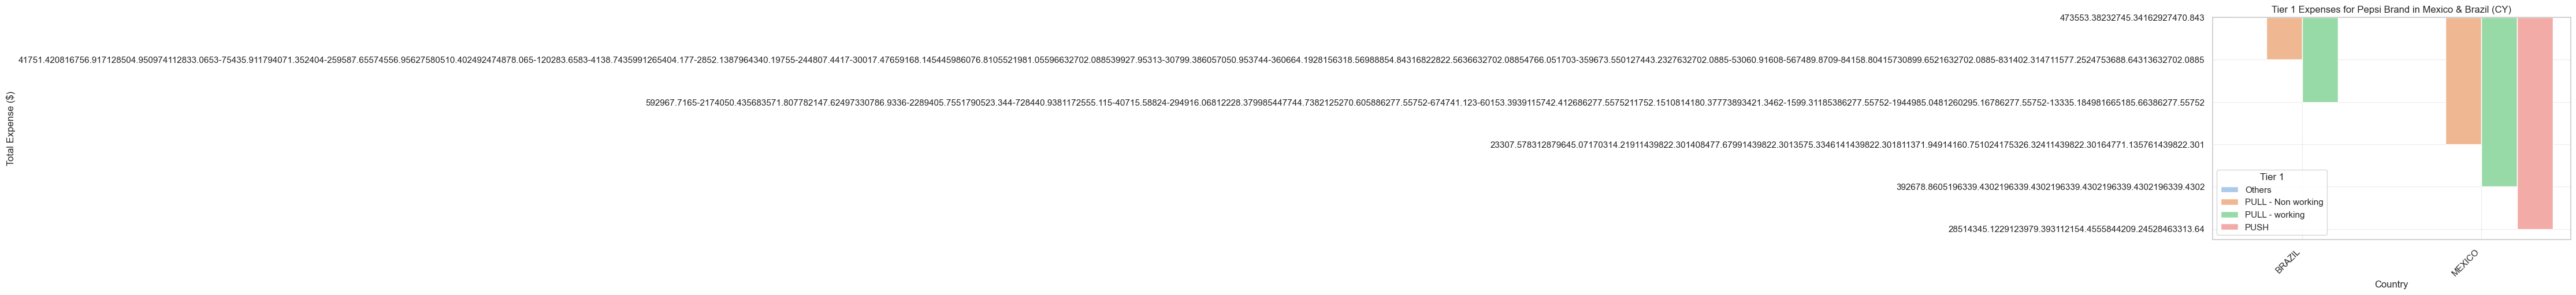

In [14]:
agent_lift.run_question(question)

In [15]:
# state = {"messages": [HumanMessage(content=question)], "next": "supervisor"}
# counter = 0
# while state["next"] != "FINISH" and counter < 10:
#     current_state = agent_lift.graph.nodes[state["next"]].invoke(state)
# #     if current_state['next'] == 'FINISH':
# #         break
#     state["messages"] = add_messages(
#         state["messages"], current_state["messages"]
#     )
#     state["next"] = current_state["next"]
    
#     current_state["messages"][0].pretty_print()
#     counter += 1

In [16]:
state = {"messages": [HumanMessage(content=question)], "next": "supervisor"}

In [17]:
state

{'messages': [HumanMessage(content='How are the Tier 1 expenses in CY varying for Mexico & Brazil for Pepsi brand?', additional_kwargs={}, response_metadata={})],
 'next': 'supervisor'}

In [18]:
current_state = agent_lift.graph.nodes[state["next"]].invoke(state)

In [19]:
current_state

{'messages': [AIMessage(content='Routing to Insight Agent for data analysis.', additional_kwargs={}, response_metadata={}, name='supervisor')],
 'next': 'Insight Agent'}

In [20]:
current_state['messages'][0].pretty_print()

================================== Ai Message ==================================
Name: supervisor

Routing to Insight Agent for data analysis.


In [21]:
state["messages"] = add_messages(
    state["messages"], current_state["messages"]
)
state["next"] = current_state["next"]

🔍 Insight Agent analyzing: How are the Tier 1 expenses in CY varying for Mexico & Brazil for Pepsi brand?
🤖 LLM Task 1: Selecting tools...
🔧 Tool Selection: {'tools_needed': ['expense'], 'reasoning': "The user is asking about the variation in Tier 1 expenses for the Pepsi brand in Mexico and Brazil for the current year (CY). This requires analyzing current year expense data to identify trends and compare metrics across the specified regions and brand. The 'analyze_expense_data' tool is specifically designed for this purpose, as it handles expense analysis, including comparisons across different dimensions such as regions and brands.", 'execution_order': ['analyze_expense_data']}
⚙️ Executing analyze_expense_data tool...
Segments are: {'approach': 'To answer this question, I will need to:\n1. Filter the data for the current year (CY) by determining the maximum year in the dataset.\n2. Filter the data for the countries Mexico and Brazil, and for the brand Pepsi.\n3. Group the data by "Co

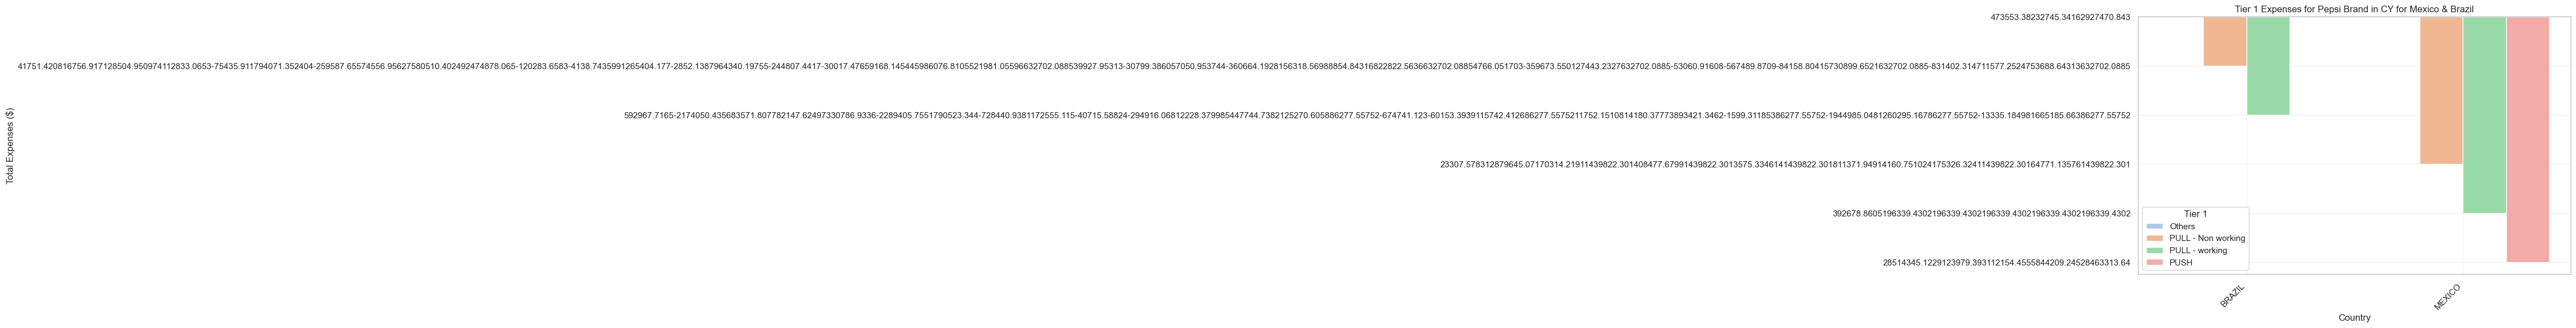

In [22]:
current_state = agent_lift.graph.nodes[state["next"]].invoke(state)

In [23]:
current_state['messages'][0].pretty_print()

================================ Human Message =================================
Name: Insight Agent

The analysis of Tier 1 expenses for the Pepsi brand in the current year (CY) reveals the following variations between Mexico and Brazil:

1. **Brazil**:
   - The expenses are distributed across various Tier 1 categories.
   - Significant spending is observed in the "PULL - working" and "Others" categories.

2. **Mexico**:
   - There is a notable expense in the "PUSH" category.
   - The spending in the "PUSH" category is significantly higher compared to Brazil.

A bar chart has been generated to visualize these variations, illustrating the total expenses for each Tier 1 category in both countries. This chart provides a clear comparison of how the expenses are allocated in Mexico and Brazil for the Pepsi brand.


In [24]:
current_state.keys()

dict_keys(['messages', 'next'])

In [25]:
current_state['messages'][0].content

'The analysis of Tier 1 expenses for the Pepsi brand in the current year (CY) reveals the following variations between Mexico and Brazil:\n\n1. **Brazil**:\n   - The expenses are distributed across various Tier 1 categories.\n   - Significant spending is observed in the "PULL - working" and "Others" categories.\n\n2. **Mexico**:\n   - There is a notable expense in the "PUSH" category.\n   - The spending in the "PUSH" category is significantly higher compared to Brazil.\n\nA bar chart has been generated to visualize these variations, illustrating the total expenses for each Tier 1 category in both countries. This chart provides a clear comparison of how the expenses are allocated in Mexico and Brazil for the Pepsi brand.'

In [26]:
current_state['messages'][0].additional_kwargs

{'figure_path': 'plots/plot_3c4fc633c7644c1295a0aaebca175ca8.png'}

In [27]:
current_state['messages'][0].additional_kwargs['figure_path']

'plots/plot_3c4fc633c7644c1295a0aaebca175ca8.png'